In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Multilayer perceptron

Set a seed for reproducibility:

In [24]:
SEED = 42

In [25]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(SEED)

## Hidden layer

For a sample $\mathbf{x}$ with $d+1$ dimensions (bias included), and a $(d+1)\times h$ weight matrix $\mathbf{W}_1$, the first hidden layer $\mathbf{h}_1$ is computed as

$$
\mathbf{h}_1 = \phi(\mathbf{W}^T_1 \mathbf{x}),
$$

where $\phi$ is the activation function and $\mathbf{h}_1$ is a column vector with $h$ hidden units. If the model has only one hidden layer, the output layer (scores) for $k$ classes is computed as

$$
\mathbf{z} = \mathbf{W}^T_2 \mathbf{h}_1.
$$

Thus, $\mathbf{W}_2$ is a $(h+1) \times k$ weight matrix. The predicted class probabilities $\mathbf{\hat{y}}$ are computed as

$$
\mathbf{\hat{y}} = \operatorname{softmax}(\mathbf{z}).
$$

In [26]:
W1 = np.random.randn(5, 3) # 4 features + 1 bias, 3 hidden units
W2 = np.random.randn(4, 2) # 3 hidden units + 1 bias, 2 classes
x = np.random.randn(5, 1) # 4 features + 1 bias
x[-1] = 1 # bias

sigmoid = lambda x: 1 / (1 + np.exp(-x))
# relu = lambda x: np.maximum(0, x) # uncomment this line to use ReLU instead of sigmoid
# tanh = lambda x: np.tanh(x) # uncomment this line to use tanh instead of sigmoid
softmax = lambda z: np.exp(z) / np.sum(np.exp(z))

h = sigmoid(np.dot(W1.T, x)) # 5 hidden units
h = np.vstack([h, [1]]) # bias
z = np.dot(W2.T, h) # 3 classes
y = softmax(z)

print(f"x:\n {x}\n")
print(f"h:\n {h}\n")
print(f"z:\n {z}\n")
print(f"y:\n {y}")

x:
 [[-1.42474819]
 [-0.54438272]
 [ 0.11092259]
 [-1.15099358]
 [ 1.        ]]

h:
 [[0.14878604]
 [0.27482016]
 [0.11544667]
 [1.        ]]

z:
 [[-0.38612109]
 [-0.16350599]]

y:
 [[0.44457493]
 [0.55542507]]


## XOR problem

The XOR problem is a two-class classification problem where the classes are not linearly separable. The XOR function is defined as

$$
\begin{array}{cc|c}
x_1 & x_2 & y \\
\hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
\end{array}

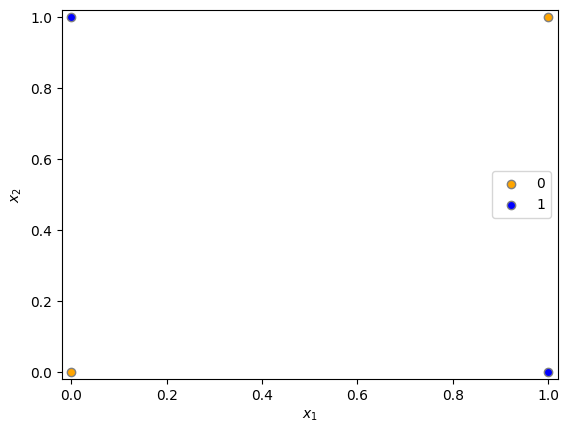

In [27]:
# plot the XOR function
from utils import plot_xor

fig, ax = plt.subplots()
plot_xor(ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

In [28]:
import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0, 1, 1, 0]]).T
print(f"X:\n {X}\n")
print(f"y:\n {y}")

X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]

y:
 [[0]
 [1]
 [1]
 [0]]


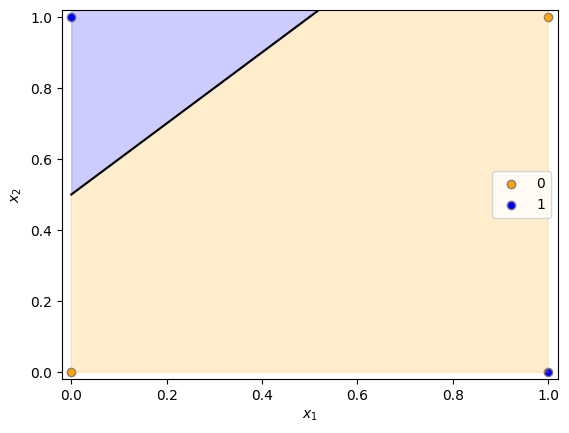

In [29]:
from utils import plot_decision_boundary_2D

fig, ax = plt.subplots()

w = np.array([-1, 1, -0.5])
plot_xor(ax=ax)
plot_decision_boundary_2D(X, w, ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

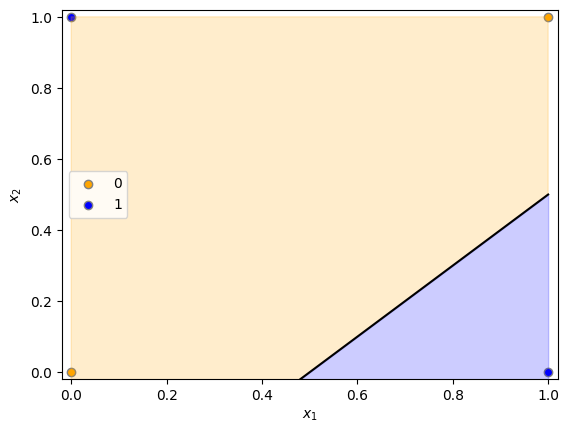

In [30]:
fig, ax = plt.subplots()

w = np.array([1, -1, -0.5])
plot_xor(ax=ax)
plot_decision_boundary_2D(X, w, ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

In [31]:
from utils import plot_classification_dataset_2D

sign = lambda x: (x > 0).astype(int)

W1 = np.array([[-1, 1, -0.5], [1, -1, -0.5]]).T  # 2 + 1 features, 2 hidden units
X_b = np.hstack([X, np.ones((X.shape[0], 1))]) # add bias
h = sign(np.dot(X_b, W1)) # 2 hidden units (projection)

print(f"W:\n {W1}\n")
print(f"X_b:\n {X_b}\n")
print(f"h:\n {h}")

W:
 [[-1.   1. ]
 [ 1.  -1. ]
 [-0.5 -0.5]]

X_b:
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]

h:
 [[0 0]
 [1 0]
 [0 1]
 [0 0]]


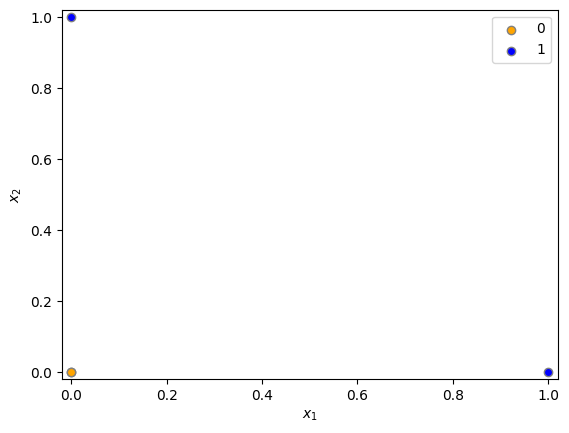

In [32]:
fig, ax = plt.subplots()

y = np.array([0, 1, 1, 0])
plot_classification_dataset_2D(h, y, negative_label=0, ax=ax, labels=['0', '1'])
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

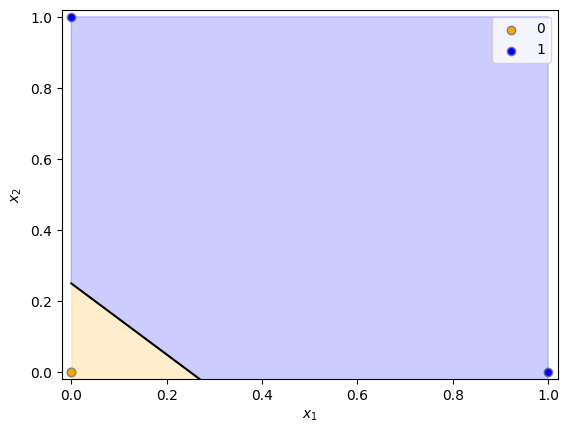

In [33]:
fig, ax = plt.subplots()

w = np.array([1, 1, -0.25])

plot_classification_dataset_2D(h, y, negative_label=0, ax=ax, labels=["0", "1"])
plot_decision_boundary_2D(h, w, ax=ax)
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
plt.show()

In [34]:
W2 = np.array([[1, 1, -0.25]]).T

h_b = np.hstack([h, np.ones((h.shape[0], 1))]) # add bias
z = np.dot(h_b, W2)
y = sign(z)


print(f"w:\n {w}\n")
print(f"h_b:\n {h_b}\n")
print(f"z:\n {z}\n")
print(f"y:\n {y}")

w:
 [ 1.    1.   -0.25]

h_b:
 [[0. 0. 1.]
 [1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]

z:
 [[-0.25]
 [ 0.75]
 [ 0.75]
 [-0.25]]

y:
 [[0]
 [1]
 [1]
 [0]]
